找一个case能够包含入轨、变轨（尖峰）、task（平台）和正常运行

In [1]:
##要执行的我会在代码段前注释“第i步”
#第一步
import numpy
import pandas as pd
import datetime
import json
import os
import xlrd# 安装xlrd == 1.2.0 版本太高会出错
import numpy as np
import matplotlib.pyplot as plt
# from sgp4.earth_gravity import wgs84
# from sgp4.io import twoline2rv
import copy
from skyfield.api import load, EarthSatellite
from skyfield.api import wgs84 as w84
from matplotlib.pyplot import MultipleLocator

## No need to run

In [2]:
def get_allfile(path):  # 获取所有文件
    all_file = []
    for f in os.listdir(path):  #listdir返回文件中所有目录
        f_name = os.path.join(path, f)
        all_file.append(f_name)
    return all_file

In [3]:
#第三步
#从TLE中提取相关字段到tle列表中
tle=[]
#key_wanted=["NORAD_CAT_ID","OBJECT_NAME","EPOCH","INCLINATION","TLE_LINE1","TLE_LINE2","SEMIMAJOR_AXIS"]
key_wanted=["NORAD_CAT_ID","OBJECT_NAME","EPOCH","INCLINATION","TLE_LINE1","TLE_LINE2","SEMIMAJOR_AXIS","MEAN_MOTION","ECCENTRICITY","RA_OF_ASC_NODE","ARG_OF_PERICENTER","MEAN_ANOMALY","BSTAR","MEAN_MOTION_DOT","MEAN_MOTION_DDOT","PERIOD","APOGEE","PERIGEE"]
tickets = r"../../Dataset/starlink"
all_file=get_allfile(tickets)  #tickets要获取文件夹名
for i in range(len(all_file)):
    filename=r"%s"%all_file[i]
    #print(filename)
    with open(filename) as f:
        temp=json.load(f)
        for item in temp:
            item["NORAD_CAT_ID"]=int(item["NORAD_CAT_ID"])
            item["EPOCH"]=datetime.datetime.strptime('%s.%s'%(item["EPOCH"],item["EPOCH_MICROSECONDS"]),"%Y-%m-%d %H:%M:%S.%f")
            temp2=dict((key,value) for key, value in item.items() if key in key_wanted)
            tle.append(temp2)
df=pd.DataFrame(tle)

#提取到tle后按“NORAD_CAT_ID”分组，并按EPOCH的逆序排序
group = df.groupby("NORAD_CAT_ID")
starlink_dict = {}
for dfGroupBy in group:
    df_dict_key = dfGroupBy[0]
    df_dict_value = pd.DataFrame(dfGroupBy[1])
    starlink_dict[df_dict_key] = df_dict_value.sort_values(by='EPOCH',ascending=False)
#print(starlink_dict['STARLINK-3282'])

In [15]:
starlink_dict[48481].to_csv('starlink_dict.csv',sep = ',',index = False,header = True)

In [ ]:
for key in starlink_dict.keys():
    if(key != 48481):continue#46326 47913
    starlink_dict[key]['alltitude'] = ''
    for i in range(len(starlink_dict[key])):#len(starlink_dict[key])
        tle_line1 = starlink_dict[key].iloc[i,12]
        tle_line2 = starlink_dict[key].iloc[i,13]
        starlink_dict[key].iloc[i,2] = datetime.datetime.strptime(starlink_dict[key].iloc[i,2],"%Y-%m-%d %H:%M:%S.%f")
        tle_epoch = starlink_dict[key].iloc[i,2]
        year = tle_epoch.year
        month = tle_epoch.month
        day = tle_epoch.day
        hour = tle_epoch.hour
        minute = tle_epoch.minute
        second = tle_epoch.second

        ts = load.timescale()
        sat = EarthSatellite(tle_line1,tle_line2,None,ts)
        t = ts.utc(year,month,day,hour,minute,second)
        geocentric = sat.at(t)
        h = w84.height_of(geocentric).km
        starlink_dict[key].iloc[i,18] = h

### Start from this line

In [2]:
starlink_dict = {}
starlink_dict[48481] = pd.read_csv('./data/starlink_dict.csv')
starlink_dict[48481].drop('Unnamed: 0',axis = 1,inplace = True)

In [4]:
for i in range(len(starlink_dict[48481])):
    starlink_dict[48481]['EPOCH'].iloc[i] = datetime.datetime.strptime(starlink_dict[48481]['EPOCH'].iloc[i],"%Y-%m-%d %H:%M:%S.%f")

c:\Python39\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


(18743.125054493, 19213.374110187004)


<Figure size 432x288 with 0 Axes>

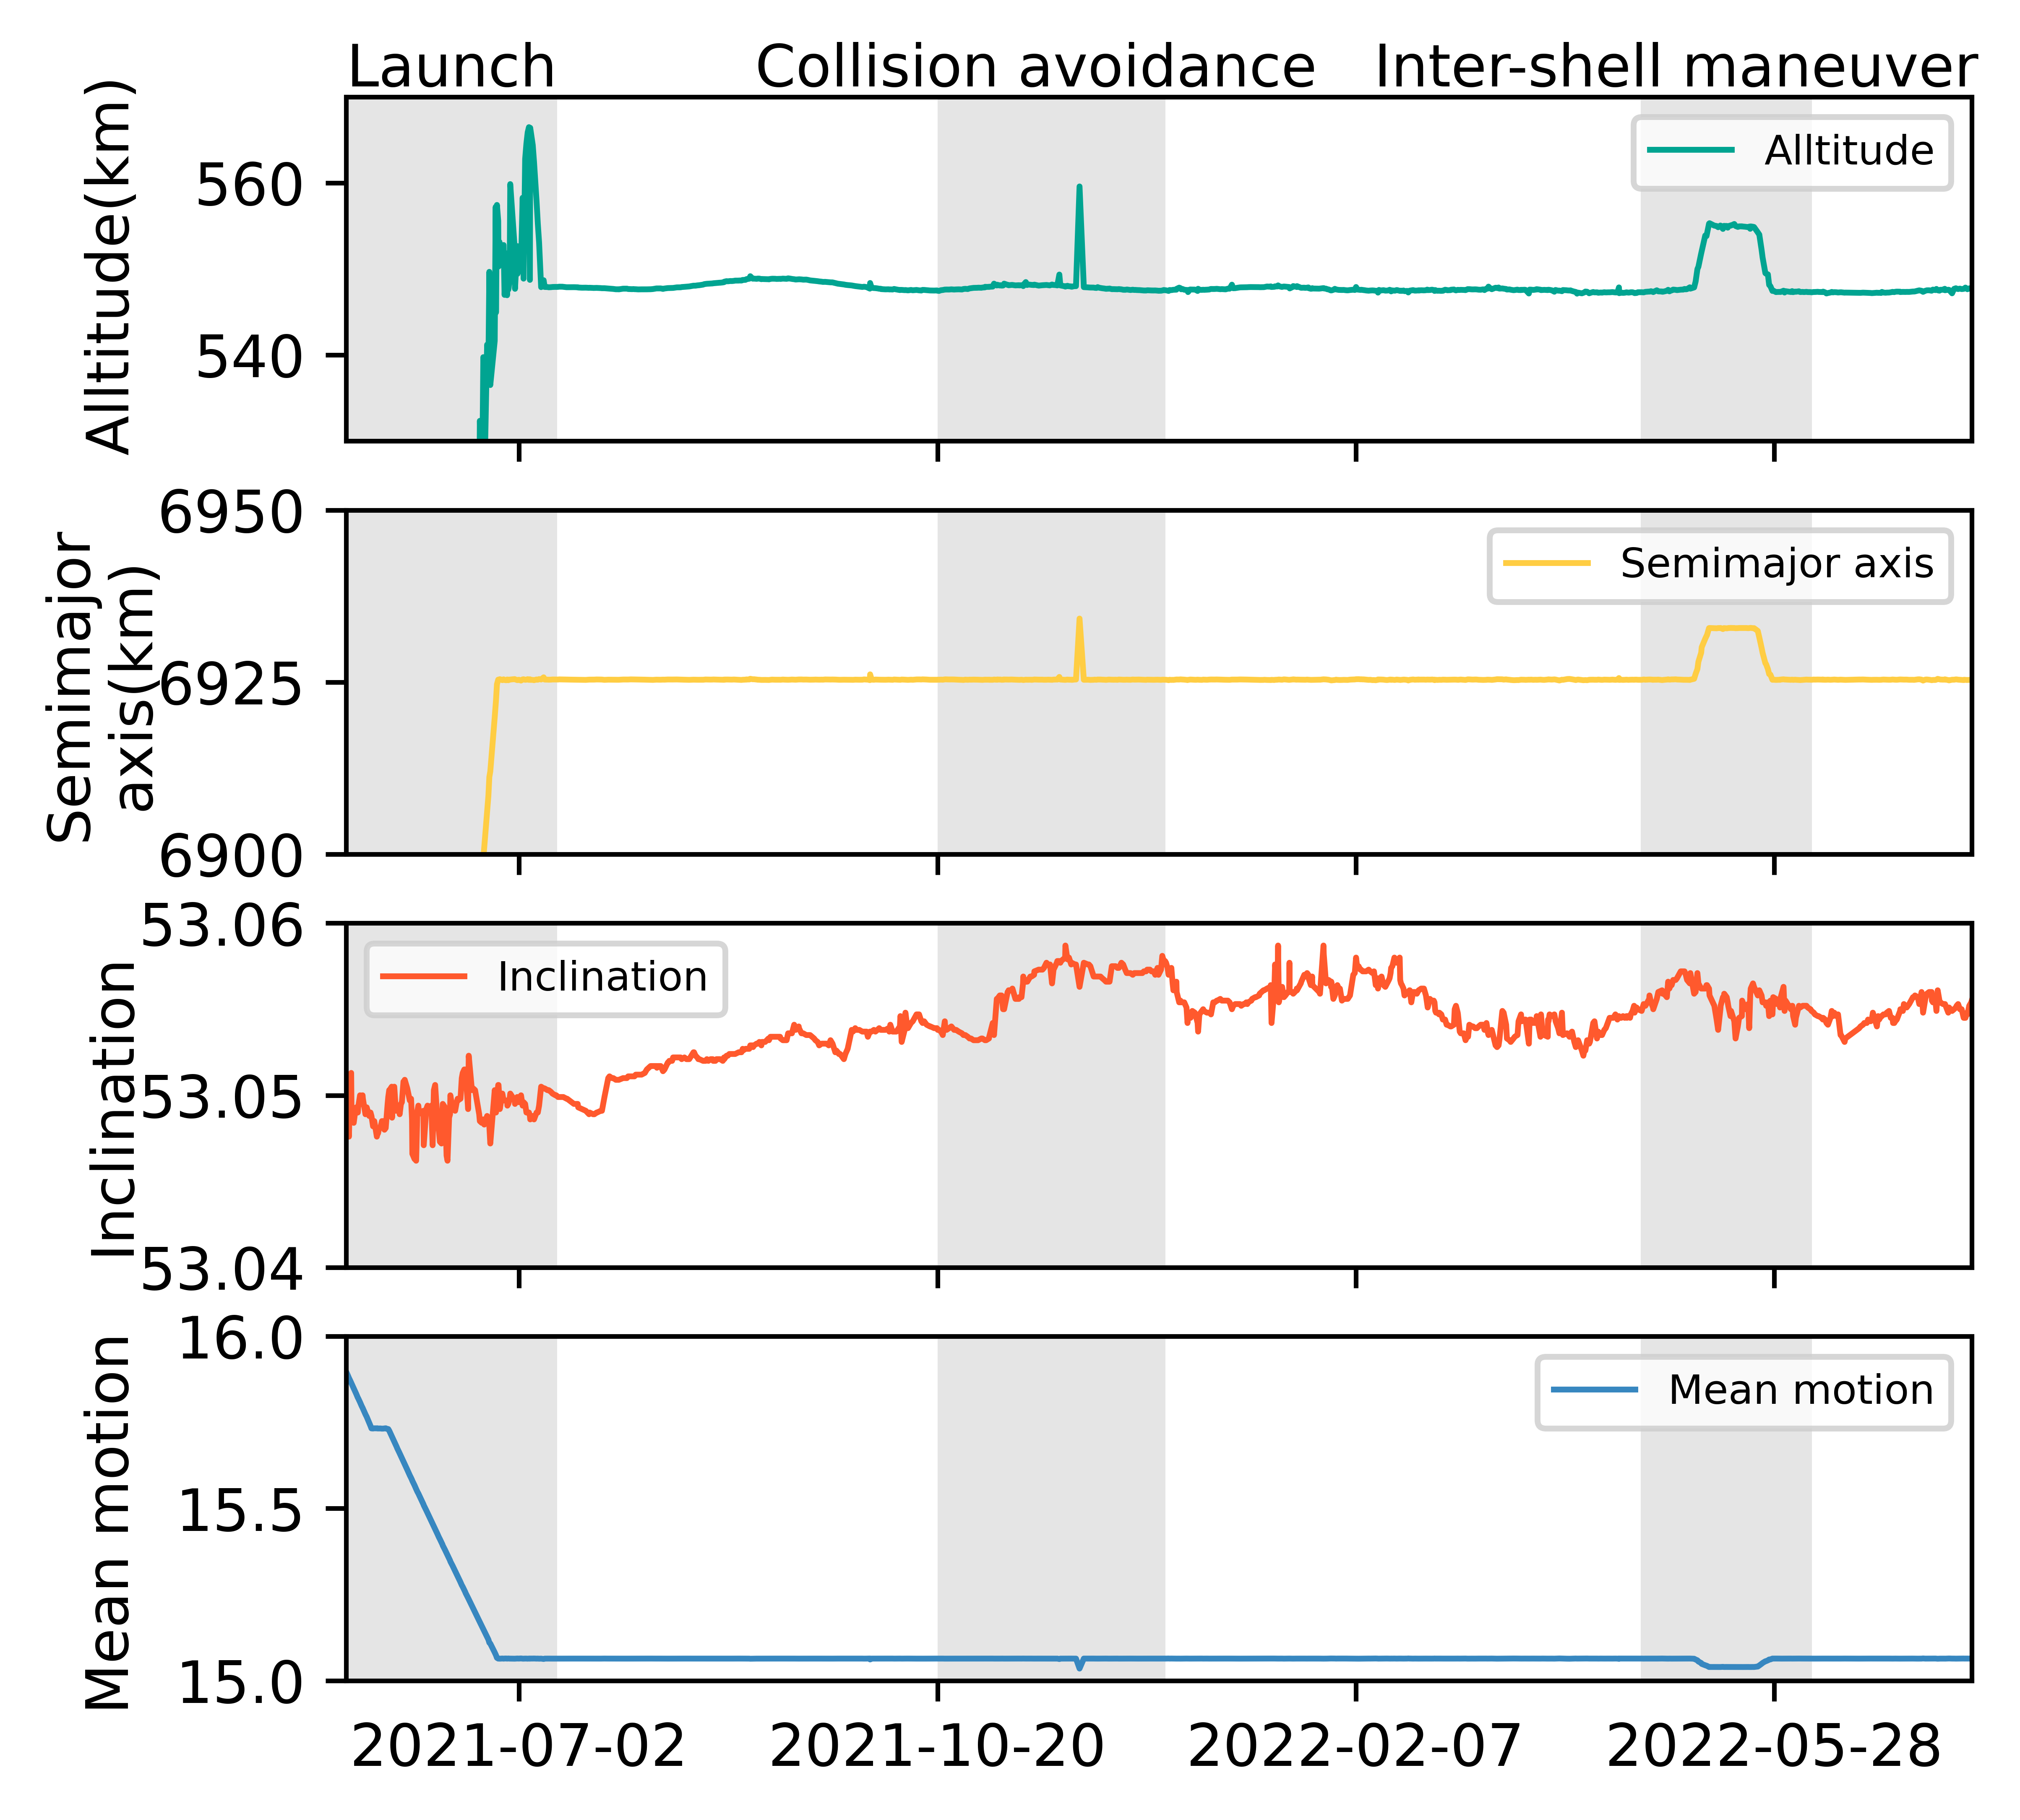

In [6]:
for key in starlink_dict.keys():
    if(key != 48481):continue
    time_list = []
    semi_axis_list = []
    inc_list = []
    mean_motion_list = []
    ecc_list = []
    raan_list = []
    aop_list = []
    mean_anomaly_list = []
    bstar_list =[]
    mean_motion_dot_list = []
    mean_motion_ddot_list = []
    period_list = []
    apogee_list = []
    perigee_list = []
    alt_list = []
    dataframe = starlink_dict[key]
    for loc_num in range(len(dataframe)):
        #time_axis_dict[dataframe.iloc[loc_num,2]] = float(dataframe.iloc[loc_num,7])
        time_list.append(dataframe.iloc[loc_num,2])
        alt_list.append(dataframe.iloc[loc_num,18])
        semi_axis_list.append(float(dataframe.iloc[loc_num,14]))
        inc_list.append(float(dataframe.iloc[loc_num,5]))
        mean_motion_list.append(float(dataframe.iloc[loc_num,3]))
        ecc_list.append(float(dataframe.iloc[loc_num,4]))
        raan_list.append(float(dataframe.iloc[loc_num,6]))
        aop_list.append(float(dataframe.iloc[loc_num,7]))
        mean_anomaly_list.append(float(dataframe.iloc[loc_num,8]))
        bstar_list.append(float(dataframe.iloc[loc_num,9]))
        mean_motion_dot_list.append(float(dataframe.iloc[loc_num,10]))
        mean_motion_ddot_list.append(float(dataframe.iloc[loc_num,11]))
        period_list.append(float(dataframe.iloc[loc_num,15]))
        apogee_list.append(float(dataframe.iloc[loc_num,16]))
        perigee_list.append(float(dataframe.iloc[loc_num,17]))
    plt.figure(1)
    fig = plt.figure(figsize=(5,5),dpi=1000)
    axes = fig.subplots(4,1,sharex=True)
    x_major_locator=MultipleLocator(110)
    plt.subplot(4,1,1)
    #plt.title(task_maneuver[i])
    plt.plot(time_list,alt_list,linewidth=1,color = "#00A491")
    plt.xticks(alpha=0)
    print(plt.xlim())
    plt.ylim((530,570))
    #plt.ylabel('Alltitude(km)')
    axes[0].axvspan(xmin=18760,xmax=18820,facecolor="gray",alpha=0.2)
    axes[0].axvspan(xmin=18920,xmax=18980,facecolor="gray",alpha=0.2)
    axes[0].axvspan(xmin=19105,xmax=19150,facecolor="gray",alpha=0.2)
    axes[0].xaxis.set_major_locator(x_major_locator)
    #plt.tick_params(axis='x', width=0)
    plt.legend(['Alltitude'],fontsize = 7)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.subplot(4,1,2)
    plt.plot(time_list,semi_axis_list,color = "#FFCD43",linewidth=1)
    plt.xticks(alpha=0)
    plt.ylim((6900,6950))
    #plt.ylabel('Semimajor axis(km)')
    axes[1].axvspan(xmin=18760,xmax=18820,facecolor="gray",alpha=0.2)
    axes[1].axvspan(xmin=18920,xmax=18980,facecolor="gray",alpha=0.2)
    axes[1].axvspan(xmin=19105,xmax=19150,facecolor="gray",alpha=0.2)
    axes[1].xaxis.set_major_locator(x_major_locator)
    #plt.tick_params(axis='x', width=0)
    plt.legend(['Semimajor axis'],fontsize = 7)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.subplot(4,1,3)
    plt.plot(time_list,inc_list,color = "#FF592D",linewidth=1)
    plt.xticks(alpha=0)
    y_major_locator=MultipleLocator(0.01)
    plt.ylim((53.04,53.06))
    #plt.ylabel('Inclination')
    axes[2].axvspan(xmin=18760,xmax=18820,facecolor="gray",alpha=0.2)
    axes[2].axvspan(xmin=18920,xmax=18980,facecolor="gray",alpha=0.2)
    axes[2].axvspan(xmin=19105,xmax=19150,facecolor="gray",alpha=0.2)
    axes[2].xaxis.set_major_locator(x_major_locator)
    axes[2].yaxis.set_major_locator(y_major_locator)
    #plt.tick_params(axis='x', width=0)
    plt.legend(['Inclination'],fontsize = 7)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.subplot(4,1,4)
    plt.plot(time_list,mean_motion_list,color = "#3787C0",linewidth=1)
    #plt.xticks(alpha=0)
    axes[3].axvspan(xmin=18760,xmax=18820,facecolor="gray",alpha=0.2)
    axes[3].axvspan(xmin=18920,xmax=18980,facecolor="gray",alpha=0.2)
    axes[3].axvspan(xmin=19105,xmax=19150,facecolor="gray",alpha=0.2)
    axes[3].xaxis.set_major_locator(MultipleLocator(110))
    #plt.tick_params(axis='x', width=0)
    plt.legend(['Mean motion'],fontsize = 7)
    #plt.ylabel('Mean motion')
    plt.ylim((15.0,16.0))
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.xlim([min(starlink_dict[48481]['EPOCH']),max(starlink_dict[48481]['EPOCH'])])
    # plt.subplot(10,1,5)
    # plt.plot(time_list,ecc_list,color = list(cnames.keys())[16],linewidth=1)
    # plt.xticks(alpha=0)
    # axes[4].axvspan(xmin=18560,xmax=18700,facecolor="gray",alpha=0.2)
    # axes[4].axvspan(xmin=18860,xmax=18920,facecolor="gray",alpha=0.2)
    # axes[4].axvspan(xmin=19120,xmax=19170,facecolor="gray",alpha=0.2)
    # #plt.tick_params(axis='x', width=0)
    # plt.legend(['ECCENTRICITY'],fontsize = 5)
    # plt.xticks(fontsize=5)
    # plt.yticks(fontsize=5)
    # plt.subplot(5,1,5)
    # plt.plot(time_list,raan_list,color = list(cnames.keys())[17],linewidth=1)
    # #plt.xticks(alpha=0)
    # axes[4].axvspan(xmin=18560,xmax=18700,facecolor="gray",alpha=0.2)
    # axes[4].axvspan(xmin=18860,xmax=18920,facecolor="gray",alpha=0.2)
    # axes[4].axvspan(xmin=19120,xmax=19170,facecolor="gray",alpha=0.2)
    # #plt.tick_params(axis='x', width=0)
    # plt.legend(['RA OF ASC NODE'],fontsize = 5)
    # plt.xticks(fontsize=5)
    # plt.yticks(fontsize=5)
    # plt.subplot(10,1,7)
    # plt.plot(time_list,aop_list,color = list(cnames.keys())[6],linewidth=1)
    # plt.xticks(alpha=0)
    # axes[6].axvspan(xmin=18560,xmax=18700,facecolor="gray",alpha=0.2)
    # axes[6].axvspan(xmin=18860,xmax=18920,facecolor="gray",alpha=0.2)
    # axes[6].axvspan(xmin=19120,xmax=19170,facecolor="gray",alpha=0.2)
    # #plt.tick_params(axis='x', width=0)
    # plt.legend(['ARG OF PERICENTER'],fontsize = 5)
    # plt.xticks(fontsize=5)
    # plt.yticks(fontsize=5)
    # plt.subplot(10,1,8)
    # plt.plot(time_list,mean_anomaly_list,color = list(cnames.keys())[7],linewidth=1)
    # plt.xticks(alpha=0)
    # axes[7].axvspan(xmin=18560,xmax=18700,facecolor="gray",alpha=0.2)
    # axes[7].axvspan(xmin=18860,xmax=18920,facecolor="gray",alpha=0.2)
    # axes[7].axvspan(xmin=19120,xmax=19170,facecolor="gray",alpha=0.2)
    # #plt.tick_params(axis='x', width=0)
    # plt.legend(['MEAN ANOMALY'],fontsize = 5)
    # plt.xticks(fontsize=5)
    # plt.yticks(fontsize=5)
    # plt.subplot(14,1,6)
    # plt.plot(time_list,bstar_list,color = list(cnames.keys())[19],linewidth=1)
    # plt.xticks(alpha=0)
    # axes[8].axvspan(xmin=18560,xmax=18700,facecolor="gray",alpha=0.2)
    # axes[8].axvspan(xmin=18860,xmax=18920,facecolor="gray",alpha=0.2)
    # axes[8].axvspan(xmin=19120,xmax=19170,facecolor="gray",alpha=0.2)
    # #plt.tick_params(axis='x', width=0)
    # plt.legend(['BSTAR'],fontsize = 5)
    # plt.xticks(fontsize=5)
    # plt.yticks(fontsize=5)
    # plt.subplot(14,1,10)
    # plt.plot(time_list,mean_motion_dot_list,color = list(cnames.keys())[9],linewidth=1)
    # plt.xticks(alpha=0)
    # axes[9].axvspan(xmin=18560,xmax=18700,facecolor="gray",alpha=0.2)
    # axes[9].axvspan(xmin=18860,xmax=18920,facecolor="gray",alpha=0.2)
    # axes[9].axvspan(xmin=19120,xmax=19170,facecolor="gray",alpha=0.2)
    # #plt.tick_params(axis='x', width=0)
    # plt.legend(['MEAN MOTION DOT'],fontsize = 5)
    # plt.xticks(fontsize=5)
    # plt.yticks(fontsize=5)
    # plt.subplot(14,1,11)
    # plt.plot(time_list,mean_motion_ddot_list,color = list(cnames.keys())[10],linewidth=1)
    # plt.xticks(alpha=0)
    # axes[10].axvspan(xmin=18560,xmax=18700,facecolor="gray",alpha=0.2)
    # axes[10].axvspan(xmin=18860,xmax=18920,facecolor="gray",alpha=0.2)
    # axes[10].axvspan(xmin=19120,xmax=19170,facecolor="gray",alpha=0.2)
    # #plt.tick_params(axis='x', width=0)
    # plt.legend(['MEAN MOTION DDOT'],fontsize = 5)
    # plt.xticks(fontsize=5)
    # plt.yticks(fontsize=5)
    # plt.subplot(14,1,12)
    # plt.plot(time_list,period_list,color = list(cnames.keys())[11],linewidth=1)
    # plt.xticks(alpha=0)
    # axes[11].axvspan(xmin=18560,xmax=18700,facecolor="gray",alpha=0.2)
    # axes[11].axvspan(xmin=18860,xmax=18920,facecolor="gray",alpha=0.2)
    # axes[11].axvspan(xmin=19120,xmax=19170,facecolor="gray",alpha=0.2)
    # #plt.tick_params(axis='x', width=0)
    # plt.legend(['PERIOD'],fontsize = 5)
    # plt.xticks(fontsize=5)
    # plt.yticks(fontsize=5)
    # plt.subplot(10,1,9)
    # plt.plot(time_list,apogee_list,color = list(cnames.keys())[12],linewidth=1)
    # plt.xticks(alpha=0)
    # axes[8].axvspan(xmin=18560,xmax=18700,facecolor="gray",alpha=0.2)
    # axes[8].axvspan(xmin=18860,xmax=18920,facecolor="gray",alpha=0.2)
    # axes[8].axvspan(xmin=19120,xmax=19170,facecolor="gray",alpha=0.2)
    # #plt.tick_params(axis='x', width=0)
    # plt.legend(['APOGEE'],fontsize = 5)
    # plt.xticks(fontsize=5)
    # plt.yticks(fontsize=5)
    # plt.subplot(10,1,10)
    # plt.plot(time_list,perigee_list,color = list(cnames.keys())[13],linewidth=1)
    # plt.xlabel('time')
    # plt.legend(['PERIGEE'],fontsize = 5)
    # plt.xticks(fontsize=5)
    # plt.yticks(fontsize=5)
    # axes[9].axvspan(xmin=18560,xmax=18700,facecolor="gray",alpha=0.2)
    # axes[9].axvspan(xmin=18860,xmax=18920,facecolor="gray",alpha=0.2)
    # axes[9].axvspan(xmin=19120,xmax=19170,facecolor="gray",alpha=0.2)
    fig.text(0.125,0.885,'Launch',fontsize = 10)
    fig.text(0.32,0.885,'Collision avoidance',fontsize = 10)
    fig.text(0.615,0.885,'Inter-shell maneuver',fontsize = 10)
    fig.text(0,0.8,'Alltitude(km)',fontsize = 10,va='center', rotation='vertical')
    fig.text(-0.02,0.6,'Semimajor',fontsize = 10,va='center', rotation='vertical')
    fig.text(0.01,0.6,'axis(km)',fontsize = 10,va='center', rotation='vertical')
    fig.text(0,0.4,'Inclination',fontsize = 10,va='center', rotation='vertical')
    fig.text(0,0.2,'Mean motion',fontsize = 10,va='center', rotation='vertical')
    # plt.subplot(212)
    # plt.plot(time_axis_dict.keys(),time_axis_dict.values())
    # plt.xlabel('time')
    # plt.ylabel('semi axis(km)')
    # plt.xticks(fontsize=5)
    # plt.yticks(fontsize=5)
    # plt.ylim((6900,6950))
    plt.savefig('figure6a.png',bbox_inches='tight')

[<AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>]


<Figure size 432x288 with 0 Axes>

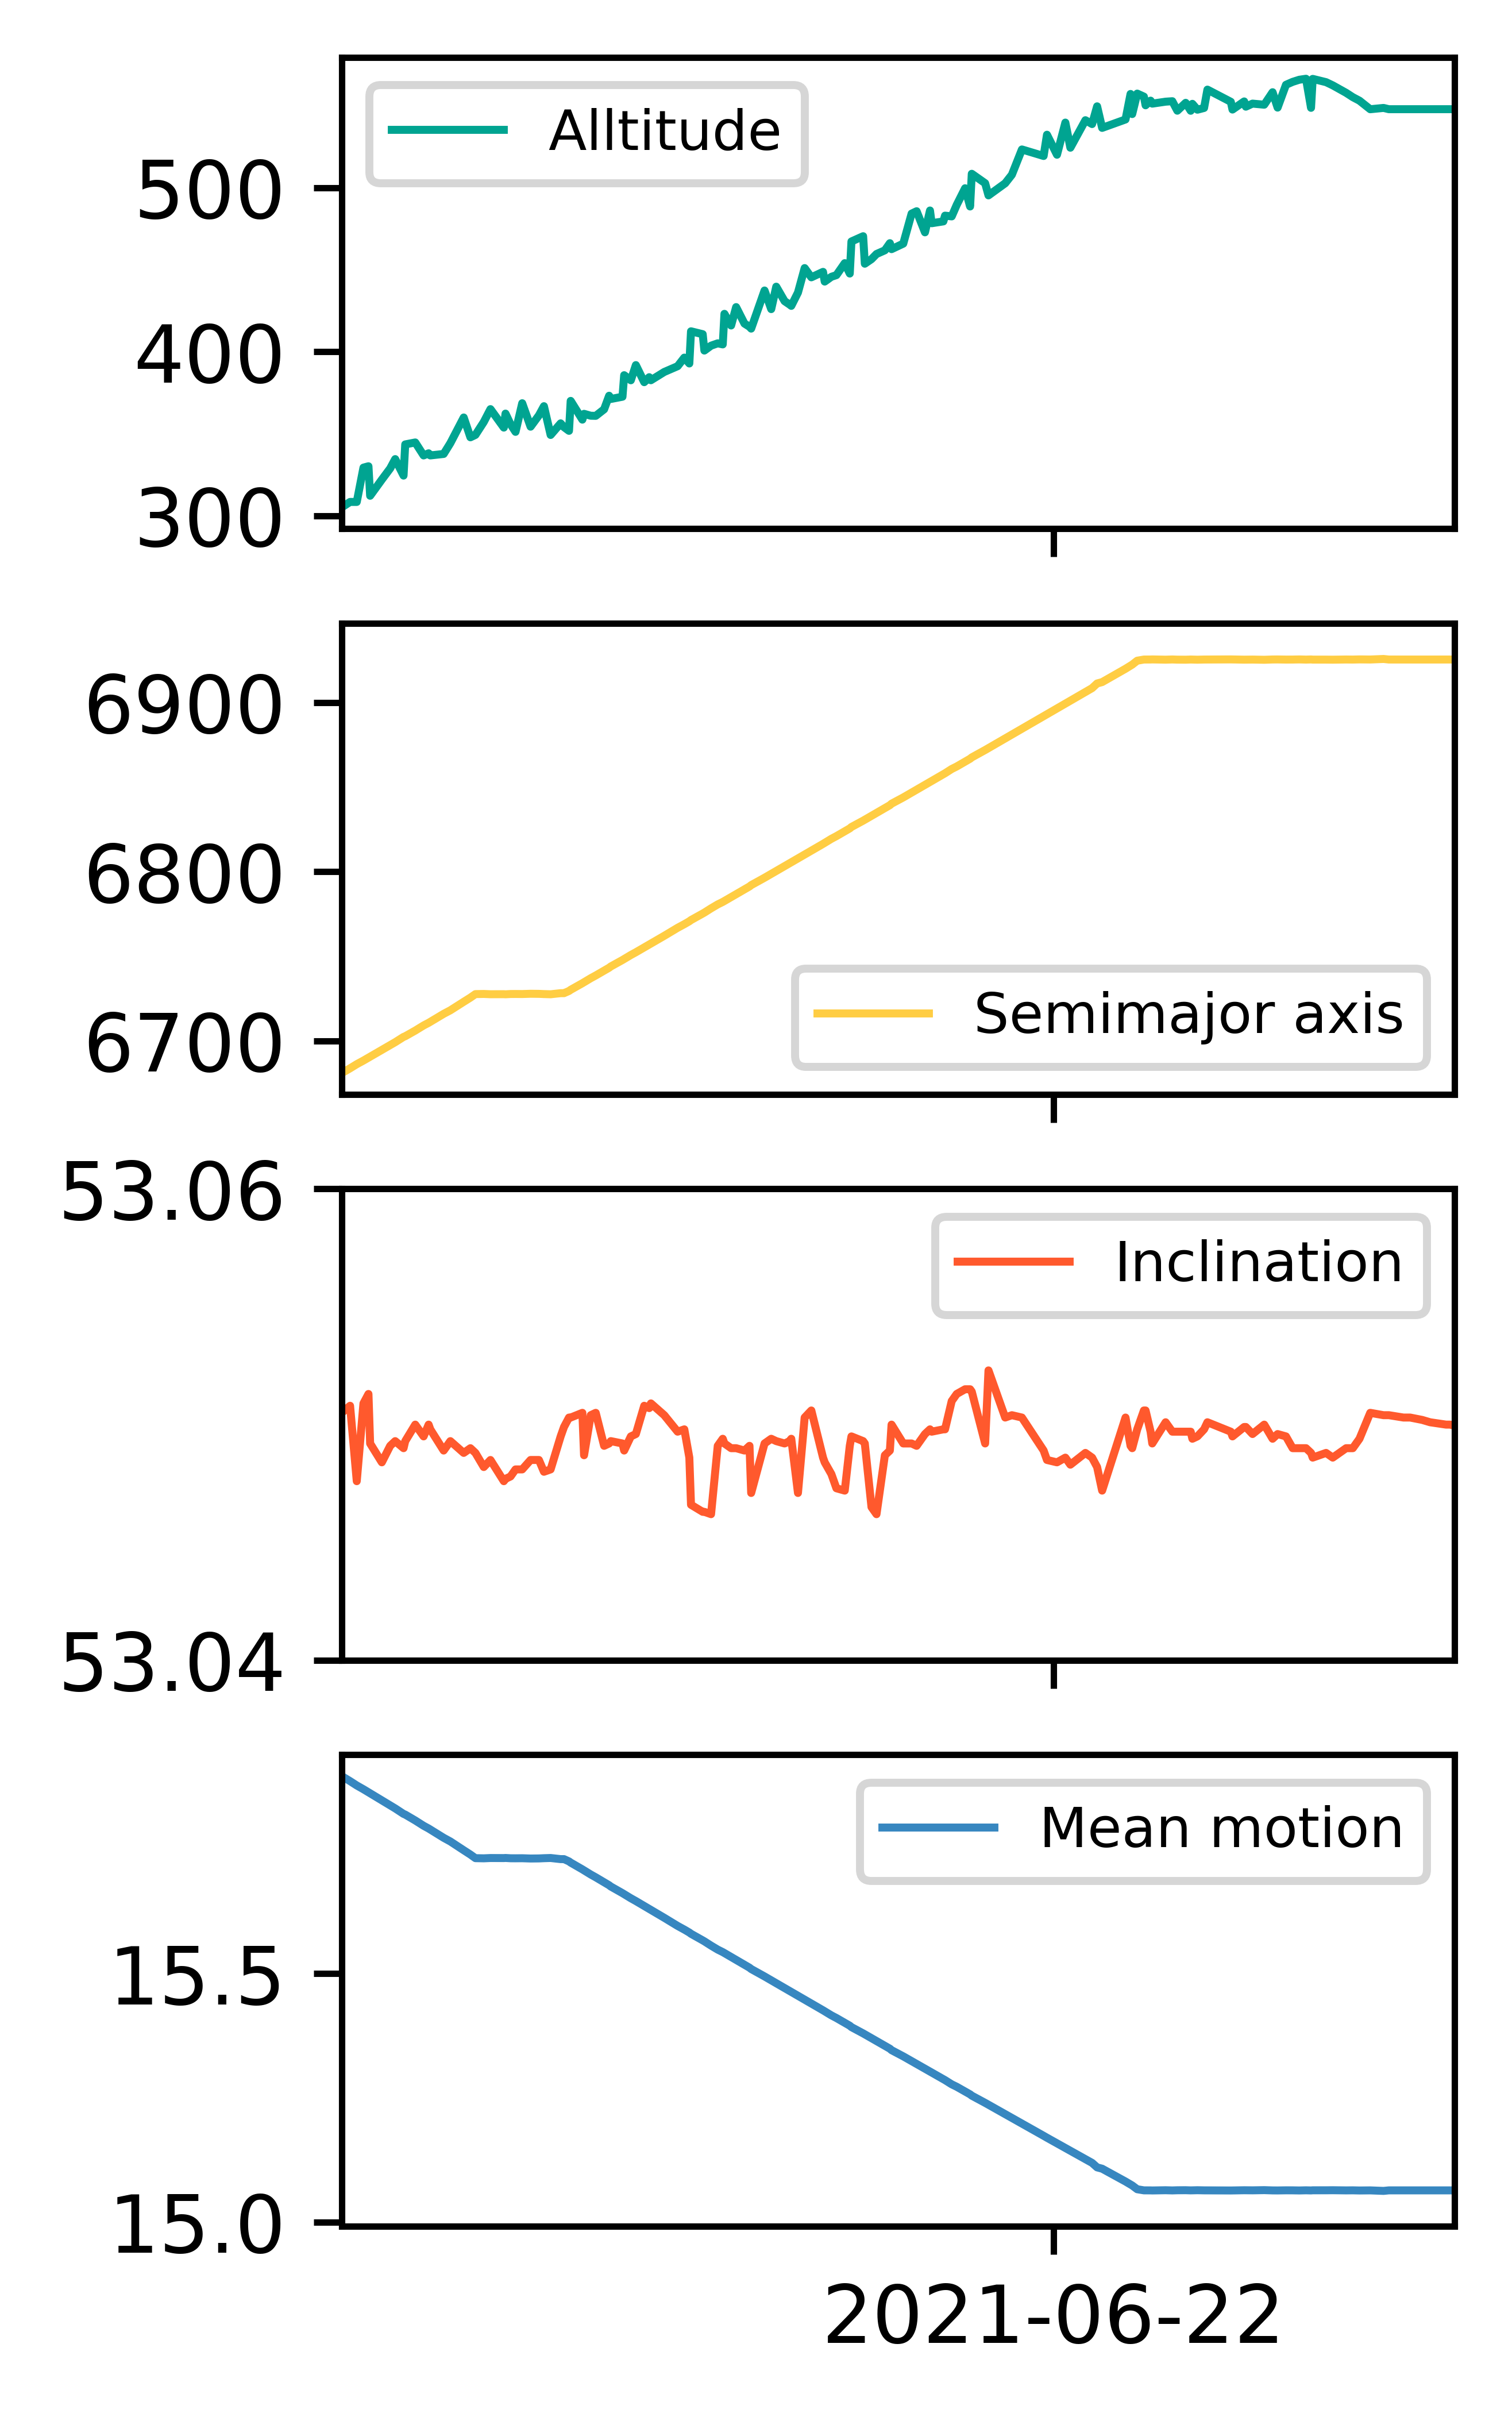

In [17]:
# plt.figure(figsize=(3,4),dpi=300)
# plt.figure(1)
# plt.plot(time_axis_dict.keys(),time_axis_dict.values())
# plt.xlim((18530.230127389503,18660))
# x_major_locator=MultipleLocator(50)
# ax=plt.gca()
# ax.xaxis.set_major_locator(x_major_locator)
# plt.yticks(fontsize = 5)
# plt.xticks(fontsize = 5)
# plt.savefig(r'C:\Users\zhaow21\Desktop\mobicom\7.1\fig8\motivating-example-in-orbit.pdf')
plt.figure(1)
fig = plt.figure(figsize=(2.5,5),dpi=1000)
axes = fig.subplots(4,1,sharex=True)
print(axes)
x_major_locator=MultipleLocator(40)
plt.subplot(4,1,1)
#plt.title(task_maneuver[i])
plt.plot(time_list,alt_list,linewidth=1,color = "#00A491")
plt.xticks(alpha=0)
plt.xlim((18760,18820))
#plt.ylim((530,570))
axes[0].xaxis.set_major_locator(x_major_locator)
# axes[0].axvspan(xmin=18560,xmax=18700,facecolor="gray",alpha=0.2)
# axes[0].axvspan(xmin=18740,xmax=18780,facecolor="gray",alpha=0.2)
# axes[0].axvspan(xmin=19120,xmax=19170,facecolor="gray",alpha=0.2)
#plt.tick_params(axis='x', width=0)
plt.legend(['Alltitude'],fontsize = 7)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
#plt.yticks(alpha=0)
plt.subplot(4,1,2)
plt.plot(time_list,semi_axis_list,color = "#FFCD43",linewidth=1)
plt.xticks(alpha=0)
#plt.yticks(alpha=0)
plt.xlim((18760,18820))
#plt.ylim((6900,6950))
axes[1].xaxis.set_major_locator(x_major_locator)
# axes[1].axvspan(xmin=18560,xmax=18700,facecolor="gray",alpha=0.2)
# axes[1].axvspan(xmin=18740,xmax=18780,facecolor="gray",alpha=0.2)
# axes[1].axvspan(xmin=19120,xmax=19170,facecolor="gray",alpha=0.2)
#plt.tick_params(axis='x', width=0)
plt.legend(['Semimajor axis'],fontsize = 7)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.subplot(4,1,3)
plt.plot(time_list,inc_list,color = "#FF592D",linewidth=1)
plt.xticks(alpha=0)
#plt.yticks(alpha=0)
plt.ylim((53.04,53.06))
plt.xlim((18760,18820))
axes[2].xaxis.set_major_locator(x_major_locator)
# axes[2].axvspan(xmin=18560,xmax=18700,facecolor="gray",alpha=0.2)
# axes[2].axvspan(xmin=18740,xmax=18780,facecolor="gray",alpha=0.2)
# axes[2].axvspan(xmin=19120,xmax=19170,facecolor="gray",alpha=0.2)
#plt.tick_params(axis='x', width=0)
plt.legend(['Inclination'],fontsize = 7)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.subplot(4,1,4)
plt.plot(time_list,mean_motion_list,color = "#3787C0",linewidth=1)
#plt.xticks(alpha=0)
plt.xlim((min(starlink_dict[48481]['EPOCH']),18820))
#plt.ylim((15.0,16.0))
#plt.yticks(alpha=0)
axes[3].xaxis.set_major_locator(x_major_locator)
# axes[3].axvspan(xmin=18560,xmax=18700,facecolor="gray",alpha=0.2)
# axes[3].axvspan(xmin=18740,xmax=18780,facecolor="gray",alpha=0.2)
# axes[3].axvspan(xmin=19120,xmax=19170,facecolor="gray",alpha=0.2)
#plt.tick_params(axis='x', width=0)
plt.legend(['Mean motion'],fontsize = 7)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.savefig(r'figure6b.pdf',bbox_inches='tight')

[<AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>]


<Figure size 432x288 with 0 Axes>

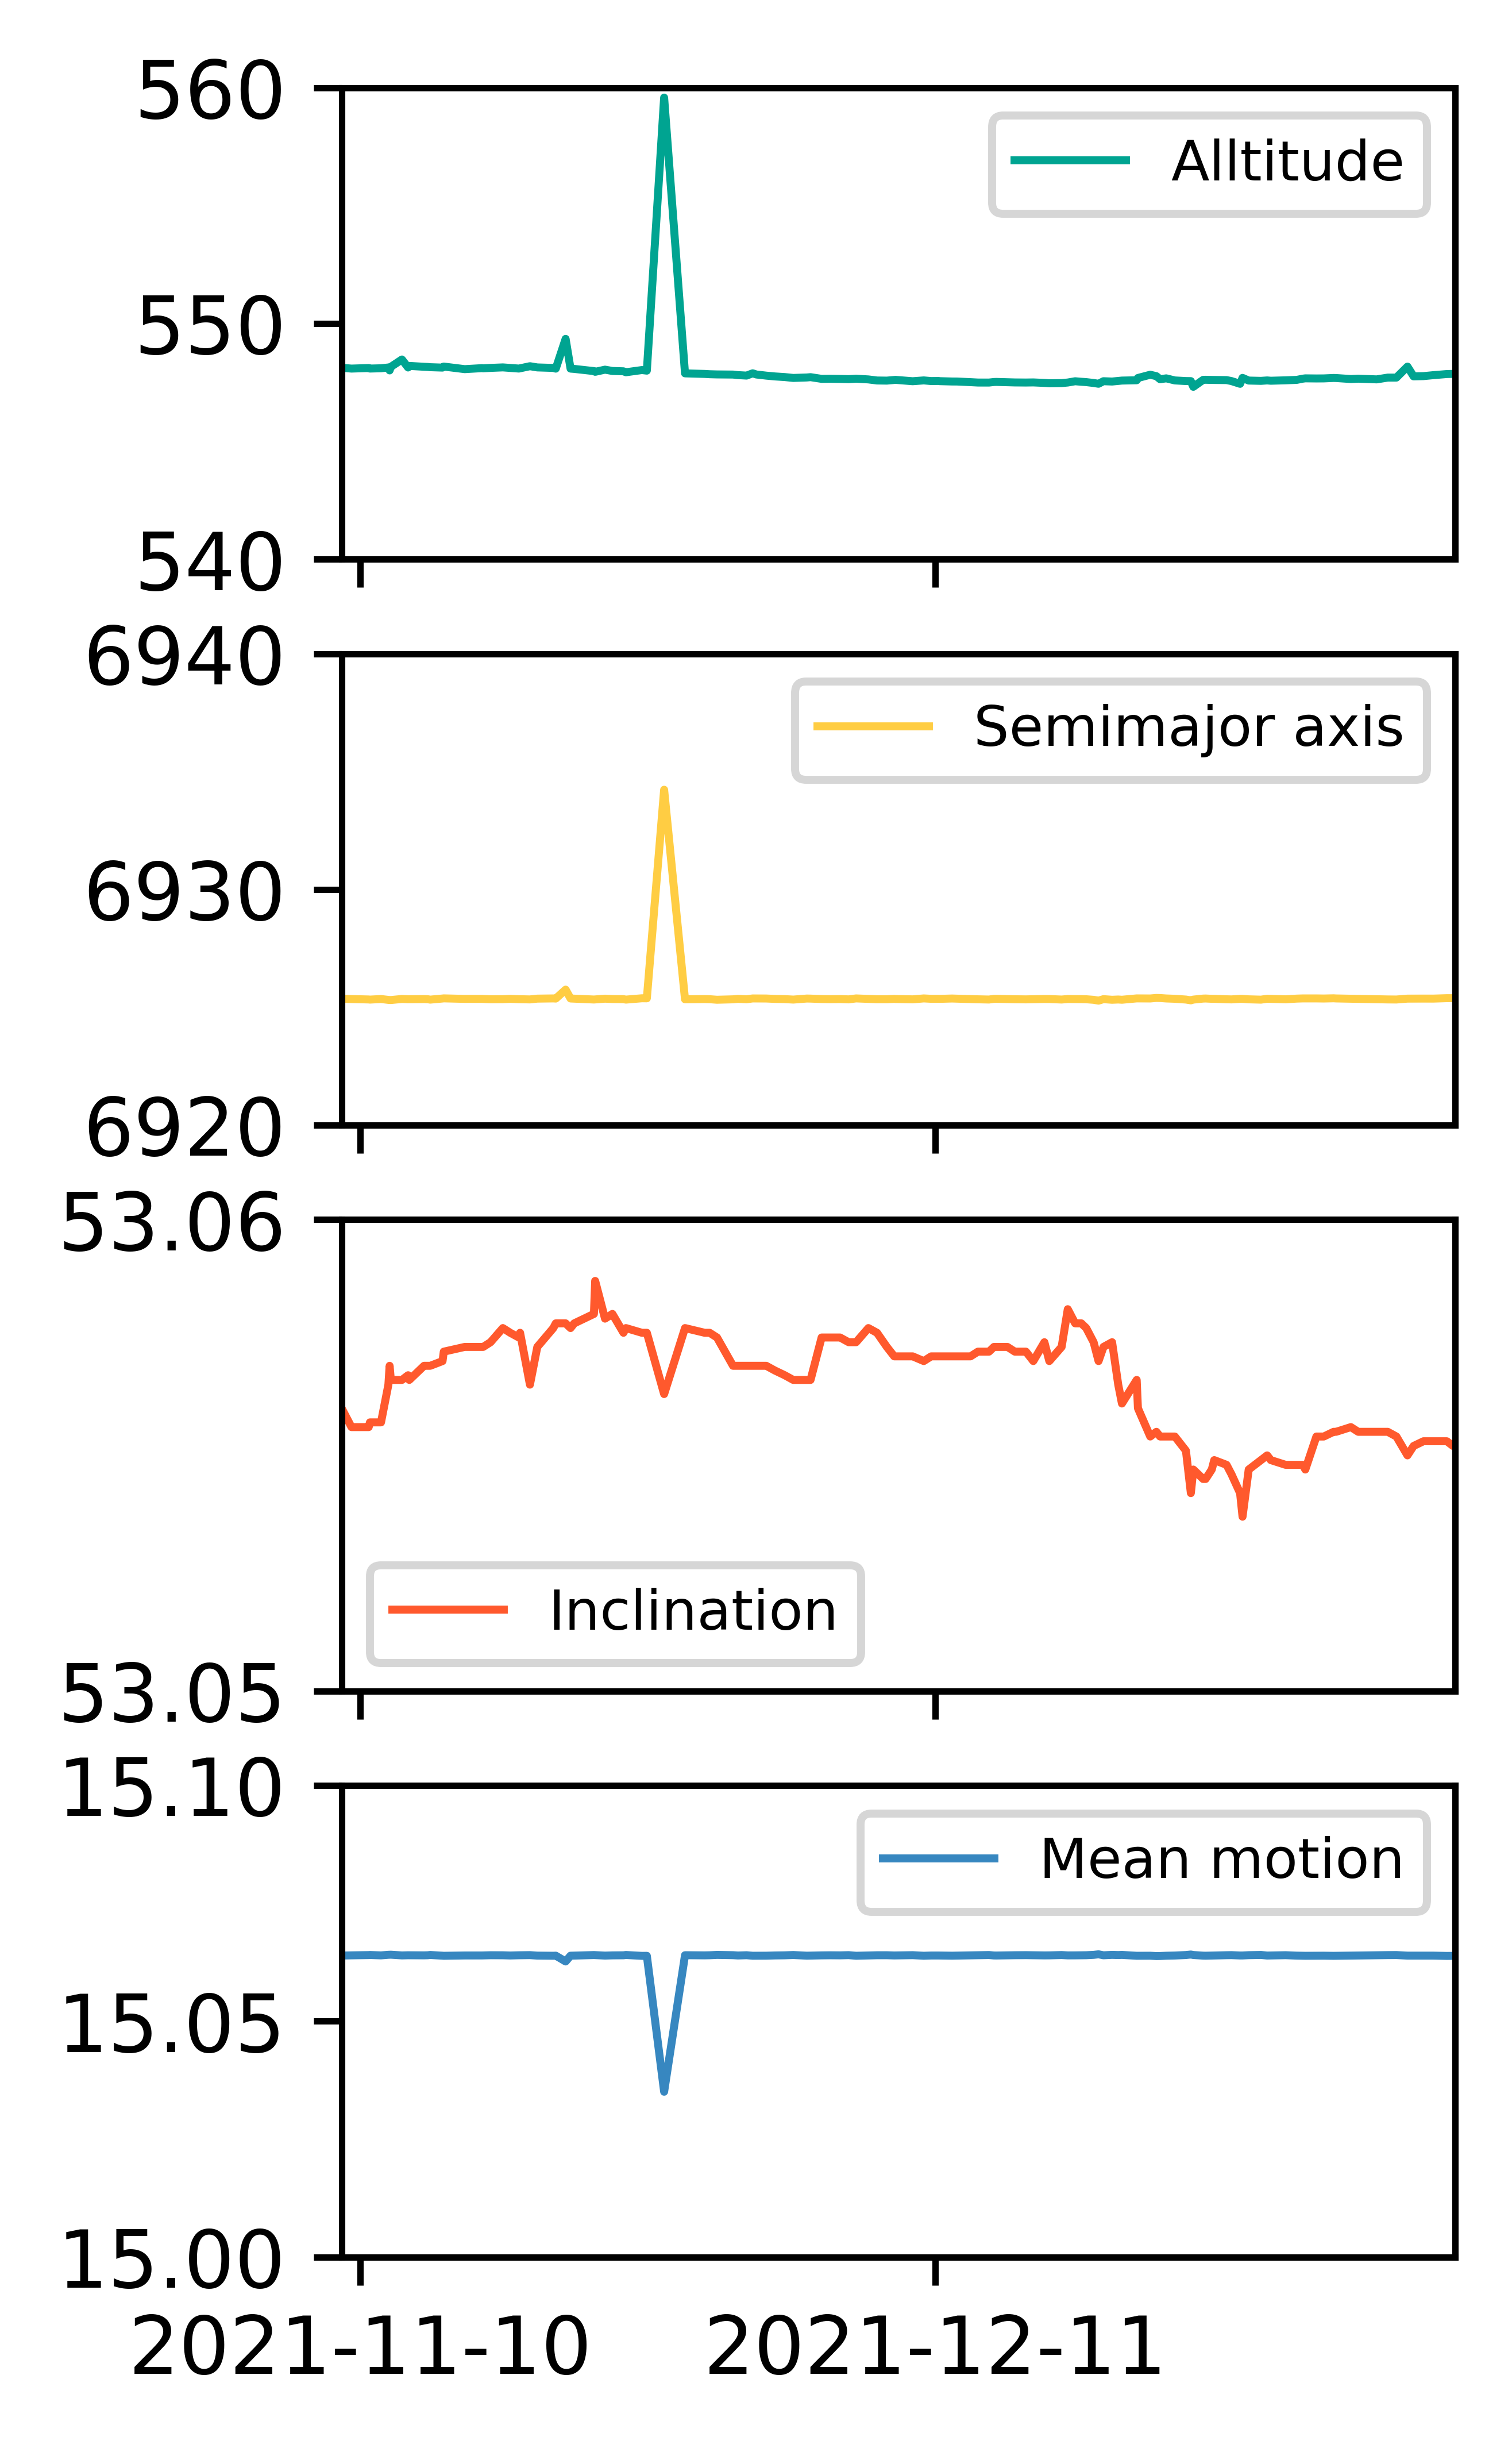

In [12]:
# plt.figure(figsize=(3,4),dpi=300)
# plt.figure(1)
# plt.plot(time_axis_dict.keys(),time_axis_dict.values())
# plt.xlim((18740,18780))
# plt.ylim((6920,6940))
# x_major_locator=MultipleLocator(30)
# ax=plt.gca()
# ax.xaxis.set_major_locator(x_major_locator)
# plt.yticks(fontsize = 5)
# plt.xticks(fontsize = 5)
# plt.savefig(r'C:\Users\zhaow21\Desktop\mobicom\7.1\fig8\motivating-example-CA.pdf')
plt.figure(1)
fig = plt.figure(figsize=(2.5,5),dpi=1000)
axes = fig.subplots(4,1,sharex=True)
print(axes)
x_major_locator=MultipleLocator(31)
plt.subplot(4,1,1)
#plt.title(task_maneuver[i])
plt.plot(time_list,alt_list,linewidth=1,color = "#00A491")
plt.xticks(alpha=0)
plt.xlim((18940,19000))
plt.ylim((540,560))
axes[0].xaxis.set_major_locator(x_major_locator)
# axes[0].axvspan(xmin=18560,xmax=18700,facecolor="gray",alpha=0.2)
# axes[0].axvspan(xmin=18740,xmax=18780,facecolor="gray",alpha=0.2)
# axes[0].axvspan(xmin=19120,xmax=19170,facecolor="gray",alpha=0.2)
#plt.tick_params(axis='x', width=0)
plt.legend(['Alltitude'],fontsize = 7)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.subplot(4,1,2)
plt.plot(time_list,semi_axis_list,color = "#FFCD43",linewidth=1)
plt.xticks(alpha=0)
plt.xlim((18940,19000))
plt.ylim((6920,6940))
axes[1].xaxis.set_major_locator(x_major_locator)
# axes[1].axvspan(xmin=18560,xmax=18700,facecolor="gray",alpha=0.2)
# axes[1].axvspan(xmin=18740,xmax=18780,facecolor="gray",alpha=0.2)
# axes[1].axvspan(xmin=19120,xmax=19170,facecolor="gray",alpha=0.2)
#plt.tick_params(axis='x', width=0)
plt.legend(['Semimajor axis'],fontsize = 7)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.subplot(4,1,3)
plt.plot(time_list,inc_list,color = "#FF592D",linewidth=1)
plt.xticks(alpha=0)
plt.xlim((18940,19000))
plt.ylim((53.05,53.06))
axes[2].xaxis.set_major_locator(x_major_locator)
# axes[2].axvspan(xmin=18560,xmax=18700,facecolor="gray",alpha=0.2)
# axes[2].axvspan(xmin=18740,xmax=18780,facecolor="gray",alpha=0.2)
# axes[2].axvspan(xmin=19120,xmax=19170,facecolor="gray",alpha=0.2)
#plt.tick_params(axis='x', width=0)
plt.legend(['Inclination'],fontsize = 7)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.subplot(4,1,4)
plt.plot(time_list,mean_motion_list,color = "#3787C0",linewidth=1)
#plt.xticks(alpha=0)
plt.xlim((18940,19000))
plt.ylim((15,15.1))
axes[3].xaxis.set_major_locator(x_major_locator)
# axes[3].axvspan(xmin=18560,xmax=18700,facecolor="gray",alpha=0.2)
# axes[3].axvspan(xmin=18740,xmax=18780,facecolor="gray",alpha=0.2)
# axes[3].axvspan(xmin=19120,xmax=19170,facecolor="gray",alpha=0.2)
#plt.tick_params(axis='x', width=0)
plt.legend(['Mean motion'],fontsize = 7)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.savefig(r'figure6c.pdf',bbox_inches='tight')

[<AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>]


<Figure size 432x288 with 0 Axes>

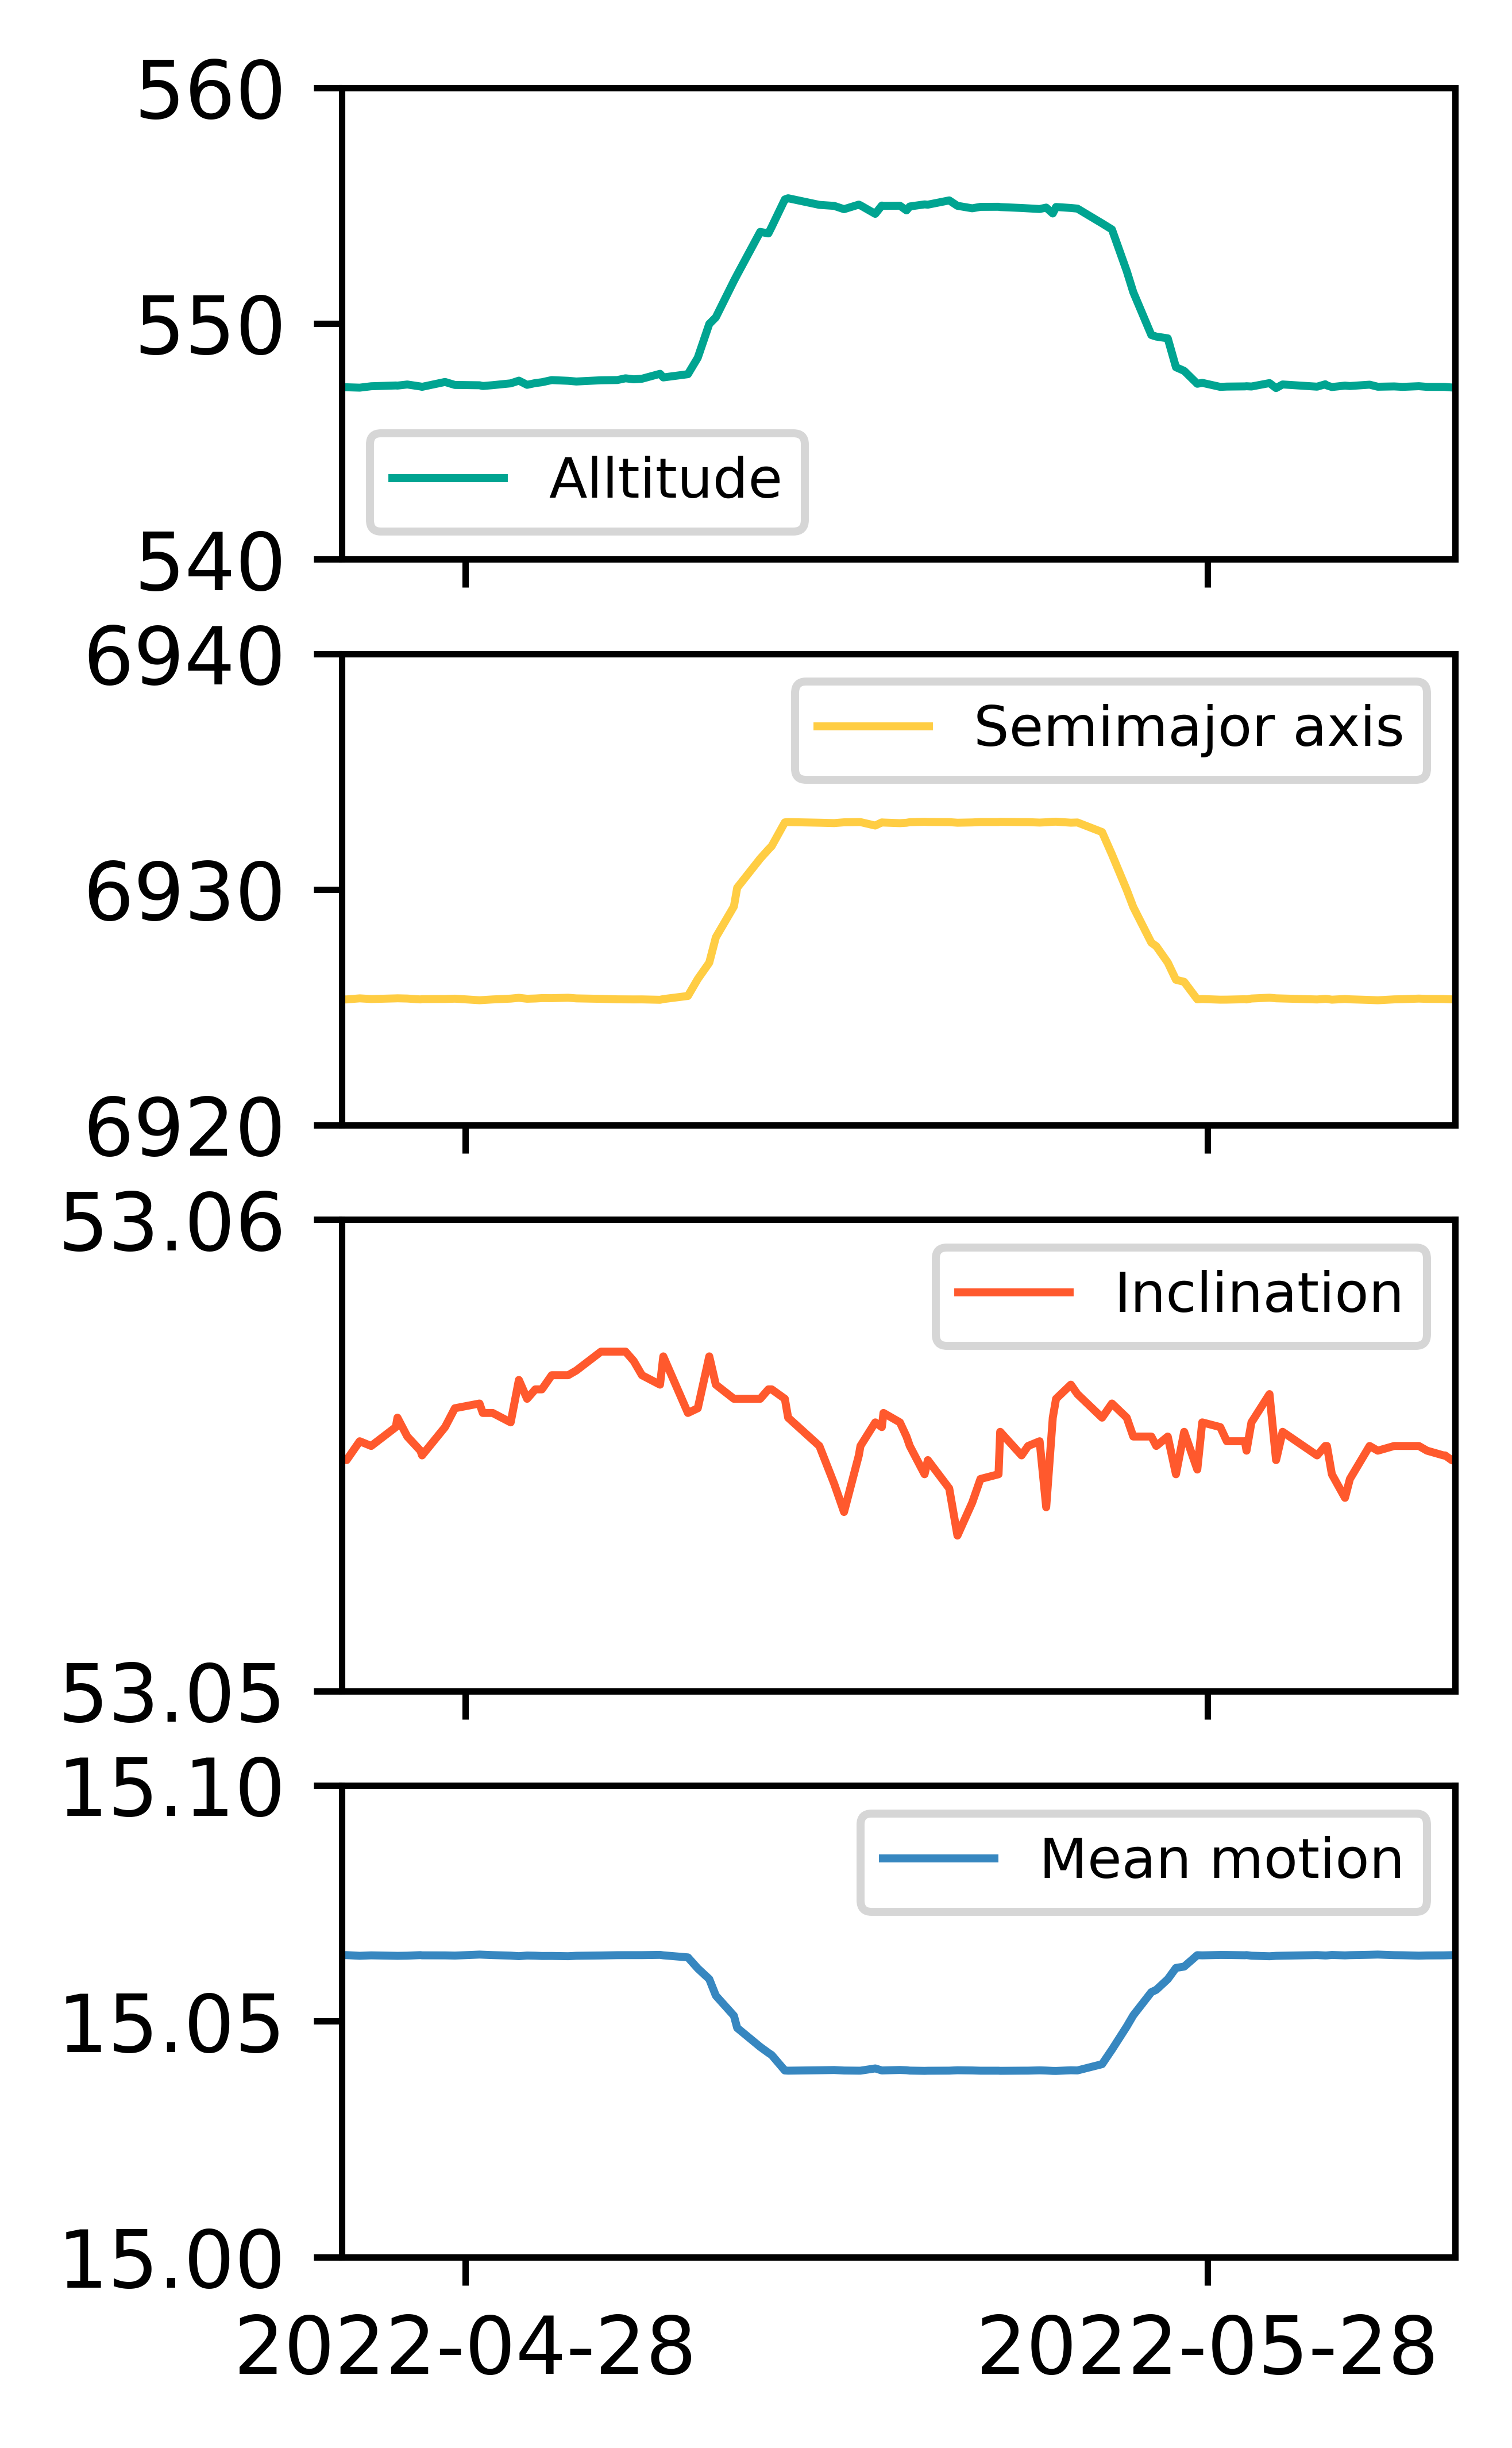

In [13]:
# plt.figure(figsize=(3,4),dpi=300)
# plt.figure(1)
# plt.plot(time_axis_dict.keys(),time_axis_dict.values())
# plt.xlim((19120,19170))
# plt.ylim((6920,6940))
# x_major_locator=MultipleLocator(30)
# ax=plt.gca()
# ax.xaxis.set_major_locator(x_major_locator)
# plt.yticks(fontsize = 5)
# plt.xticks(fontsize = 5)
# plt.savefig(r'C:\Users\zhaow21\Desktop\mobicom\7.1\fig8\motivating-example-task.pdf')
plt.figure(1)
fig = plt.figure(figsize=(2.5,5),dpi=1000)
axes = fig.subplots(4,1,sharex=True)
print(axes)
x_major_locator=MultipleLocator(30)
plt.subplot(4,1,1)
#plt.title(task_maneuver[i])
plt.plot(time_list,alt_list,linewidth=1,color = "#00A491")
plt.xticks(alpha=0)
plt.xlim((19105,19150))
plt.ylim((540,560))
axes[0].xaxis.set_major_locator(x_major_locator)
# axes[0].axvspan(xmin=18560,xmax=18700,facecolor="gray",alpha=0.2)
# axes[0].axvspan(xmin=18740,xmax=18780,facecolor="gray",alpha=0.2)
# axes[0].axvspan(xmin=19120,xmax=19170,facecolor="gray",alpha=0.2)
#plt.tick_params(axis='x', width=0)
plt.legend(['Alltitude'],fontsize = 7)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.subplot(4,1,2)
plt.plot(time_list,semi_axis_list,color = "#FFCD43",linewidth=1)
plt.xticks(alpha=0)
plt.xlim((19105,19150))
plt.ylim((6920,6940))
axes[1].xaxis.set_major_locator(x_major_locator)
# axes[1].axvspan(xmin=18560,xmax=18700,facecolor="gray",alpha=0.2)
# axes[1].axvspan(xmin=18740,xmax=18780,facecolor="gray",alpha=0.2)
# axes[1].axvspan(xmin=19120,xmax=19170,facecolor="gray",alpha=0.2)
#plt.tick_params(axis='x', width=0)
plt.legend(['Semimajor axis'],fontsize = 7)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.subplot(4,1,3)
plt.plot(time_list,inc_list,color = "#FF592D",linewidth=1)
plt.xticks(alpha=0)
plt.xlim((19105,19150))
plt.ylim((53.05,53.06))
axes[2].xaxis.set_major_locator(x_major_locator)
# axes[2].axvspan(xmin=18560,xmax=18700,facecolor="gray",alpha=0.2)
# axes[2].axvspan(xmin=18740,xmax=18780,facecolor="gray",alpha=0.2)
# axes[2].axvspan(xmin=19120,xmax=19170,facecolor="gray",alpha=0.2)
#plt.tick_params(axis='x', width=0)
plt.legend(['Inclination'],fontsize = 7)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.subplot(4,1,4)
plt.plot(time_list,mean_motion_list,color = "#3787C0",linewidth=1)
#plt.xticks(alpha=0)
plt.xlim((19105,19150))
plt.ylim((15,15.1))
axes[3].xaxis.set_major_locator(x_major_locator)
# axes[3].axvspan(xmin=18560,xmax=18700,facecolor="gray",alpha=0.2)
# axes[3].axvspan(xmin=18740,xmax=18780,facecolor="gray",alpha=0.2)
# axes[3].axvspan(xmin=19120,xmax=19170,facecolor="gray",alpha=0.2)
#plt.tick_params(axis='x', width=0)
plt.legend(['Mean motion'],fontsize = 7)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.savefig(r'figure6d.pdf',bbox_inches='tight')